In [7]:
import pandas as pd
df = pd.read_excel('./TaskGenie CRUD Evaluation.xlsx', index_col=0)
df.head(100)

,Natural Language Query,Category,Purpose,Categorization Result,Categorization Result Correct,TaskGenie Result,TaskGenie Result Reasonable,Siri Result,Siri Result Reasonable,ChatGPT Result,ChatGPT Result Reasonable
Index,,,,,,,,,,,
1,"""How's the weather in Philly compared with San...",Conversation,General inquiry,Conversation,True,"Philly has hot, humid summers and cold winters...",True,NaN,True,The weather in Philadelphia and San Francisco ...,True
2,"""Can you recommend a good cuisine to make on T...",Conversation,Recommend a cuisine,Conversation,True,Traditional Thanksgiving cuisine typically inc...,True,NaN,True,Certainly! While traditional American Thanksgi...,True
3,"""Tell me a fun fact about space.""",Conversation,Share interesting information,Conversation,True,A fun fact about space is that it’s completely...,True,NaN,True,A fun fact about space is that there is a giga...,True
4,"""Can you help me calculate a 15% tip for a $50...",Conversation,Quick calculation,Conversation,True,Sure! A 15% tip on a $50 bill is calculated as...,True,NaN,True,"Sure! To calculate a 15% tip for a $50 bill, y...",True
5,"""Can you translate 'hello' into French?""",Conversation,Language assistance,Read,False,## Summary\nIt seems there were no results fou...,True,NaN,True,"Yes, ""hello"" in French is ""bonjour.""",True
...,...,...,...,...,...,...,...,...,...,...,...
96,"""Cancel my doctor’s appointment next Thursday.""",Delete,Remove an event,Delete,True,NaN,True,NaN,True,You can phrase your request like this:\n \n\n ...,False
97,"""Delete the lunch break from my calendar for t...",Delete,Remove an event,Delete,True,NaN,True,NaN,True,"Sure! The agenda item ""Discuss Q4 goals"" has b...",False
98,"""Cancel the brainstorming session scheduled fo...",Delete,Remove an event,Delete,True,NaN,True,NaN,False,To change the date of the product launch event...,False


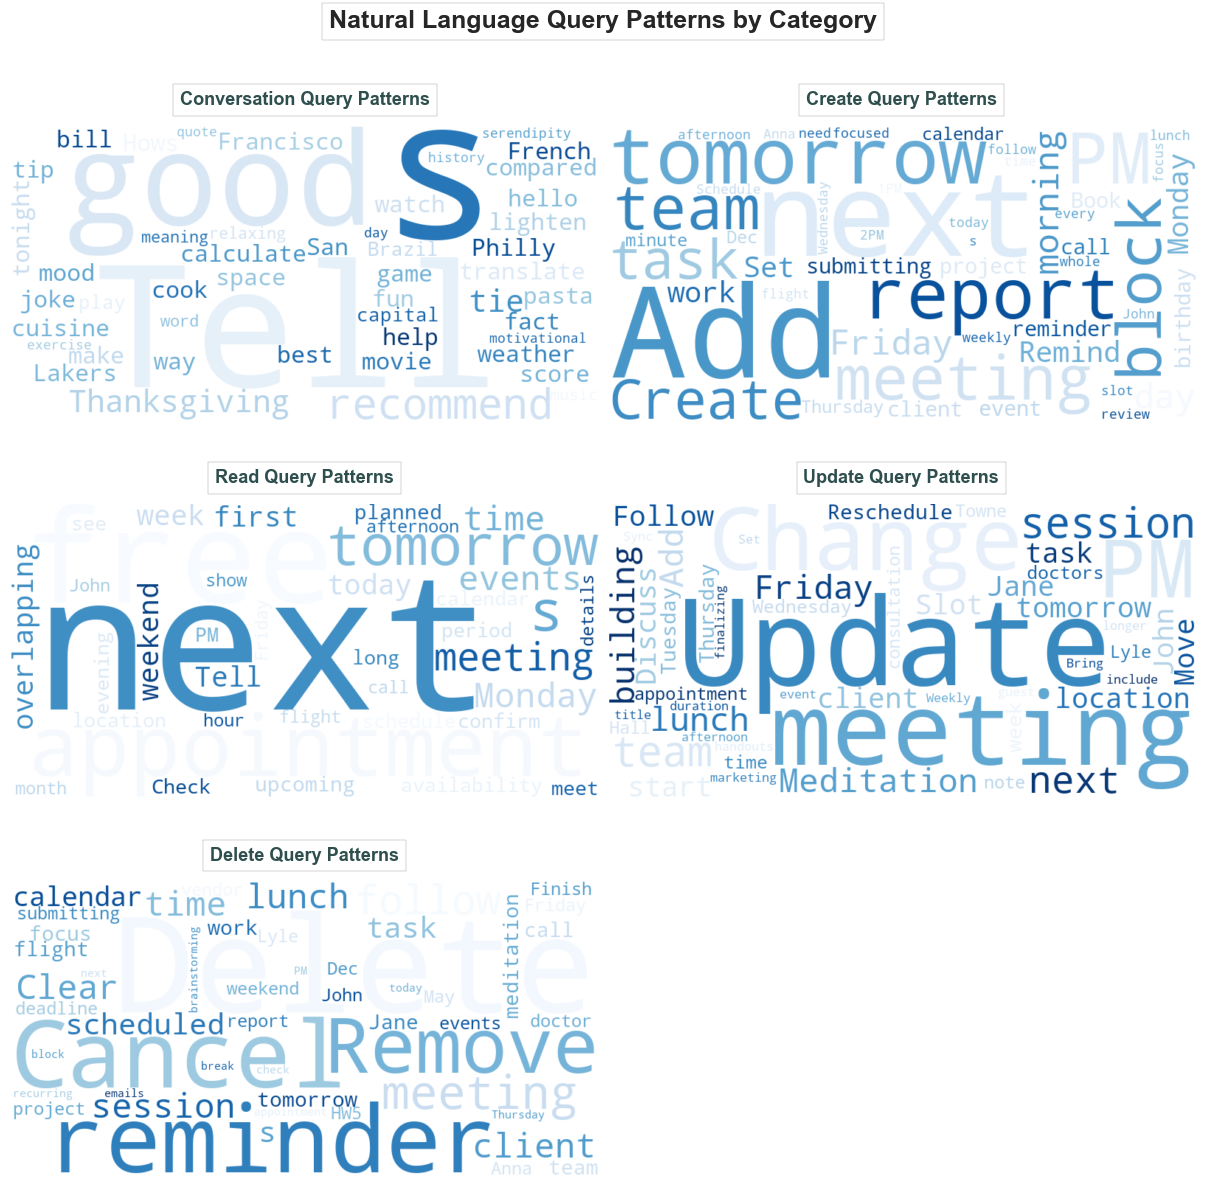

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Function to clean text
def clean_text(text):
    # Remove quotes and special characters
    text = re.sub(r'["\'\.,?]', '', text)
    return text

# Create a figure with 2x3 subplots with transparent background
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 2, figsize=(12, 12), facecolor='none')
fig.patch.set_alpha(0.0)

# Define categories and titles
categories = ['Conversation', 'Create', 'Read', 'Update', 'Delete']
titles = ['Conversation Query Patterns', 'Create Query Patterns', 
          'Read Query Patterns', 'Update Query Patterns', 'Delete Query Patterns']

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate word cloud for each category
for idx, (category, title) in enumerate(zip(categories, titles)):
    # Filter data for the category
    category_texts = df[df['Category'] == category]['Natural Language Query'].str.strip('"').tolist()
    
    # Combine all texts and clean
    text = ' '.join(map(clean_text, category_texts))
    
    # Create and generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Blues',
        max_words=50,
        min_font_size=8
    ).generate(text)
    
    # Plot
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis('off')
    
    # Add styled title
    axes[idx].set_title(title, pad=15, size=13, fontweight='bold', 
                       color='darkslategray', bbox=dict(facecolor='none', 
                       edgecolor='gray', alpha=0.8, pad=5))
    
    # Set background color for subplot to transparent
    axes[idx].set_facecolor('none')
    
    # Add box around subplot
    for spine in axes[idx].spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1.5)

# Remove the last subplot
axes[-1].remove()

# Add main title with styling
plt.suptitle('Natural Language Query Patterns by Category', 
             size=18, y=1.02, fontweight='bold', 
             bbox=dict(facecolor='none', edgecolor='gray', 
                      alpha=0.8, pad=5))

# Adjust layout
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
# plt.tight_layout()

# Add a text watermark
# fig.text(0.99, 0.01, 'Created with Python', 
#          ha='right', va='bottom', alpha=0.5, 
#          fontsize=8, fontstyle='italic')

plt.show()

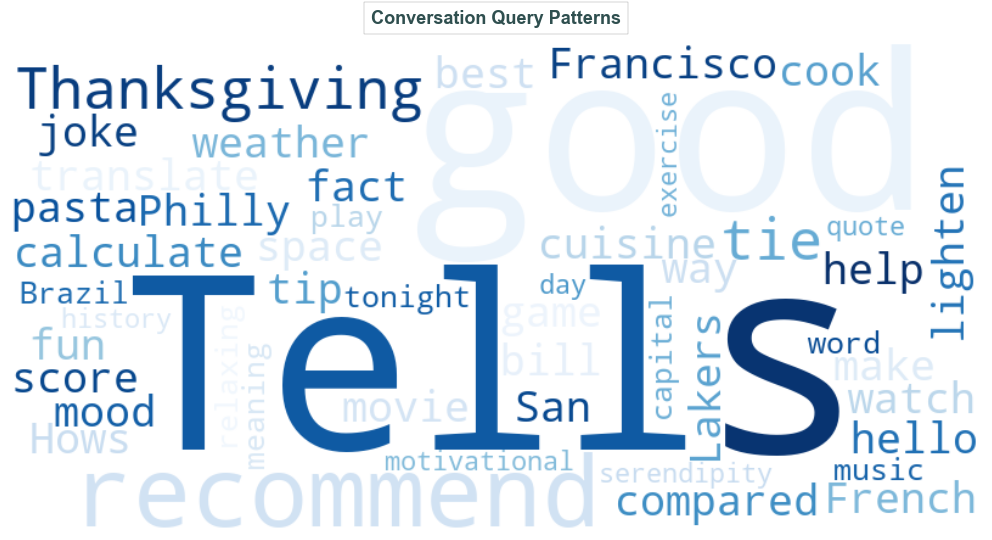

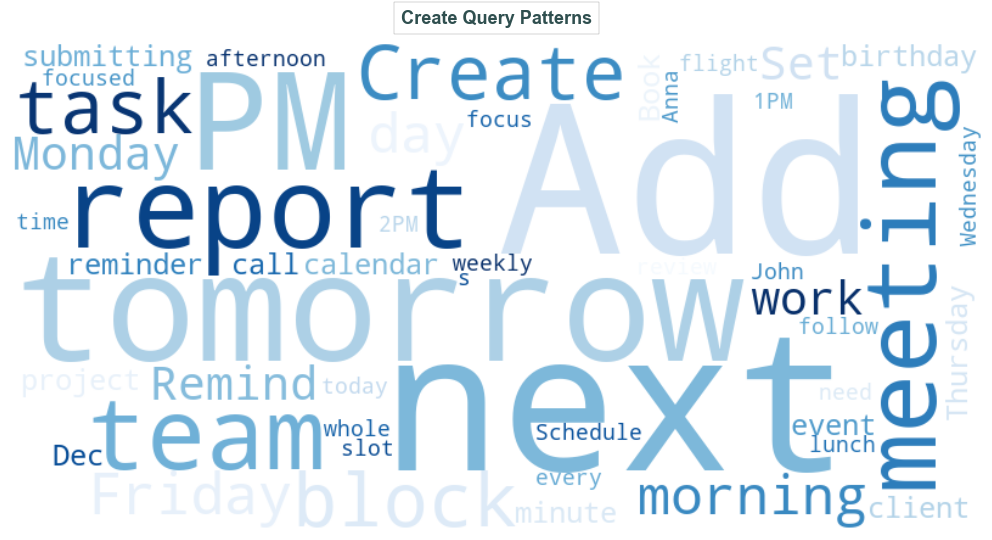

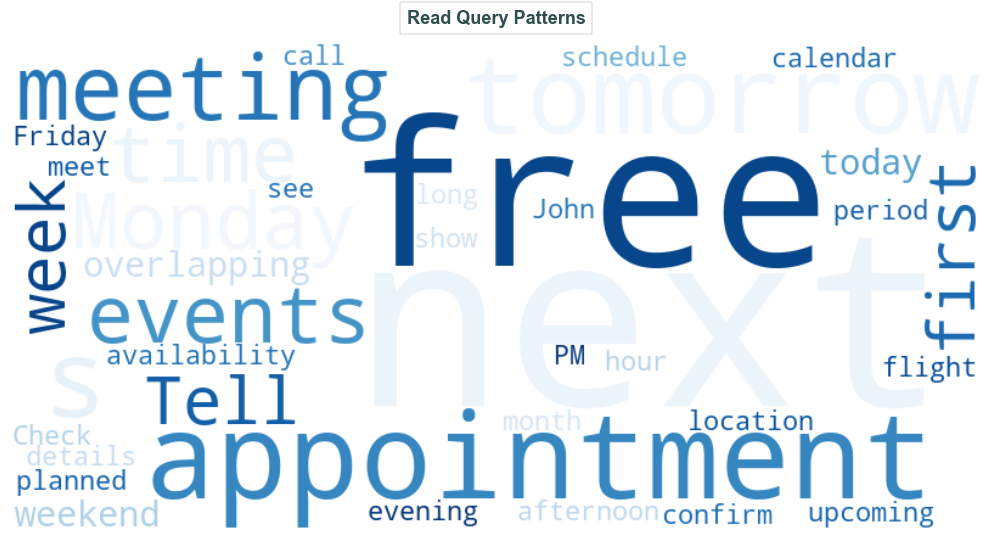

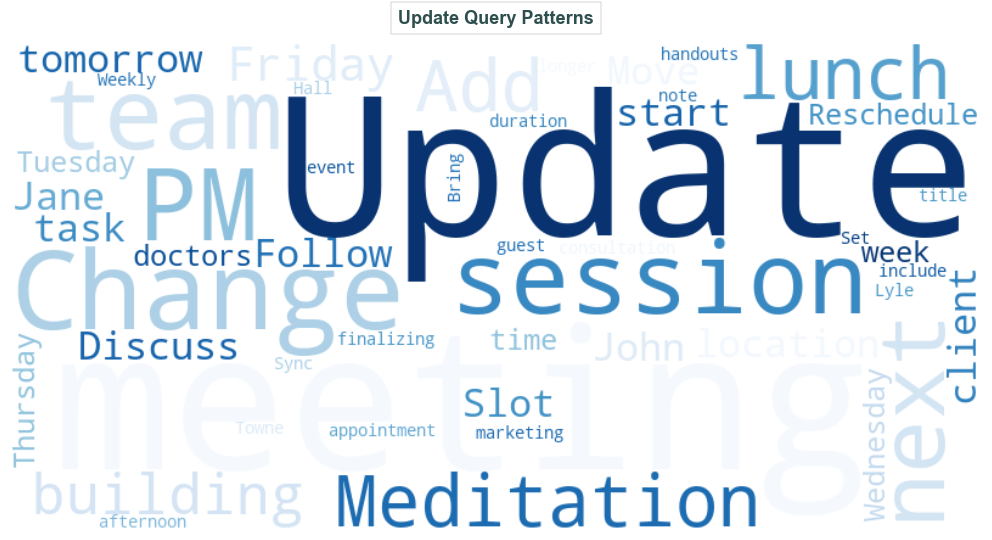

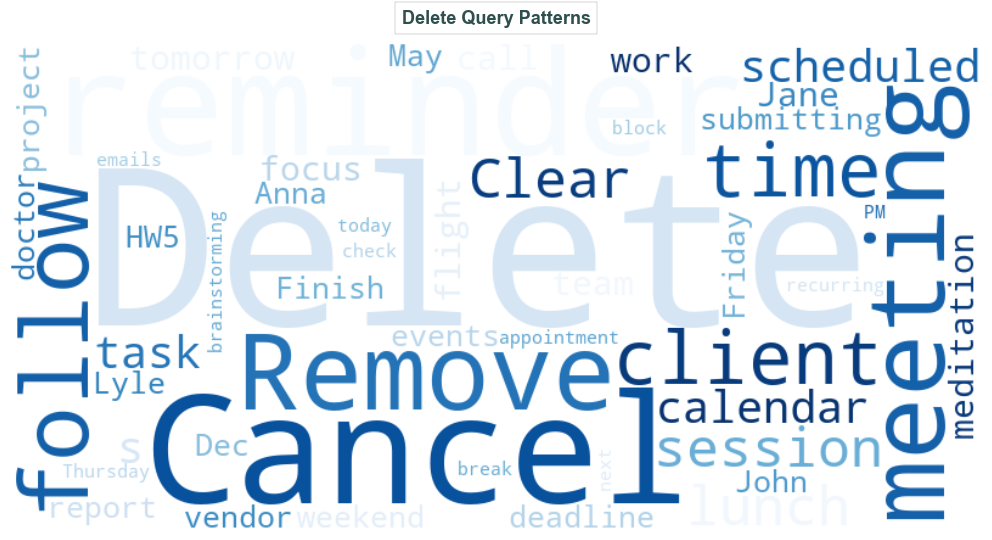

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Function to clean text
def clean_text(text):
    # Remove quotes and special characters
    text = re.sub(r'["\'\.,?]', '', text)
    return text

# Function to create styled word cloud plot
def create_wordcloud_plot(category_texts, title):
    # Set the style
    plt.style.use('seaborn-v0_8')
    
    # Create figure with transparent background
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')
    fig.patch.set_alpha(0.0)
    
    # Combine all texts and clean
    text = ' '.join(map(clean_text, category_texts))
    
    # Create and generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='Blues',
        max_words=50,
        min_font_size=8
    ).generate(text)
    
    # Plot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    
    # Add styled title
    ax.set_title(title, pad=15, size=13, fontweight='bold', 
                color='darkslategray', bbox=dict(facecolor='none', 
                edgecolor='gray', alpha=0.8, pad=5))
    
    # Set background color for plot to transparent
    ax.set_facecolor('none')
    
    # Add box around plot
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1.5)
    
    # Add a text watermark
    # fig.text(0.99, 0.01, 'Created with Python', 
    #          ha='right', va='bottom', alpha=0.5, 
    #          fontsize=8, fontstyle='italic')
    
    plt.tight_layout(pad=1.0)
    return fig

# Define categories and titles
categories = ['Conversation', 'Create', 'Read', 'Update', 'Delete']
titles = ['Conversation Query Patterns', 'Create Query Patterns', 
          'Read Query Patterns', 'Update Query Patterns', 'Delete Query Patterns']

# Generate separate word cloud for each category
for category, title in zip(categories, titles):
    # Filter data for the category
    category_texts = df[df['Category'] == category]['Natural Language Query'].str.strip('"').tolist()
    
    # Create and display the plot
    fig = create_wordcloud_plot(category_texts, title)
    plt.show()

In [10]:
import pandas as pd

def analyze_proportions_by_category(df):
    """
    Calculate the proportion of True values for each metric grouped by Category
    
    Parameters:
    df (pandas.DataFrame): Input dataframe containing the results
    
    Returns:
    pandas.DataFrame: Proportions of True values for each metric by category
    """
    # Columns to analyze
    columns = [
        'Categorization Result Correct',
        'TaskGenie Result Reasonable',
        'Siri Result Reasonable',
        'ChatGPT Result Reasonable'
    ]
    
    # Initialize a dictionary to store results
    results = {}
    
    # Calculate proportions for each category
    for column in columns:
        # Group by Category and calculate mean of True values
        proportions = df.groupby('Category')[column].mean()
        results[column] = proportions
    
    # Combine results into a DataFrame
    result_df = pd.DataFrame(results)
    
    # Round results to 3 decimal places
    result_df = result_df.round(3)
    
    return result_df

# Calculate the proportions
proportions = analyze_proportions_by_category(df)

# Display results
print("\nProportions of True values by Category:")
print(proportions)


Proportions of True values by Category:
              Categorization Result Correct  TaskGenie Result Reasonable  \
Category                                                                   
Conversation                           0.75                         1.00   
Create                                 1.00                         0.95   
Delete                                 1.00                         1.00   
Read                                   1.00                         1.00   
Update                                 1.00                         0.90   

              Siri Result Reasonable  ChatGPT Result Reasonable  
Category                                                         
Conversation                    0.85                        1.0  
Create                          0.90                        0.0  
Delete                          0.35                        0.0  
Read                            0.45                        0.0  
Update                        

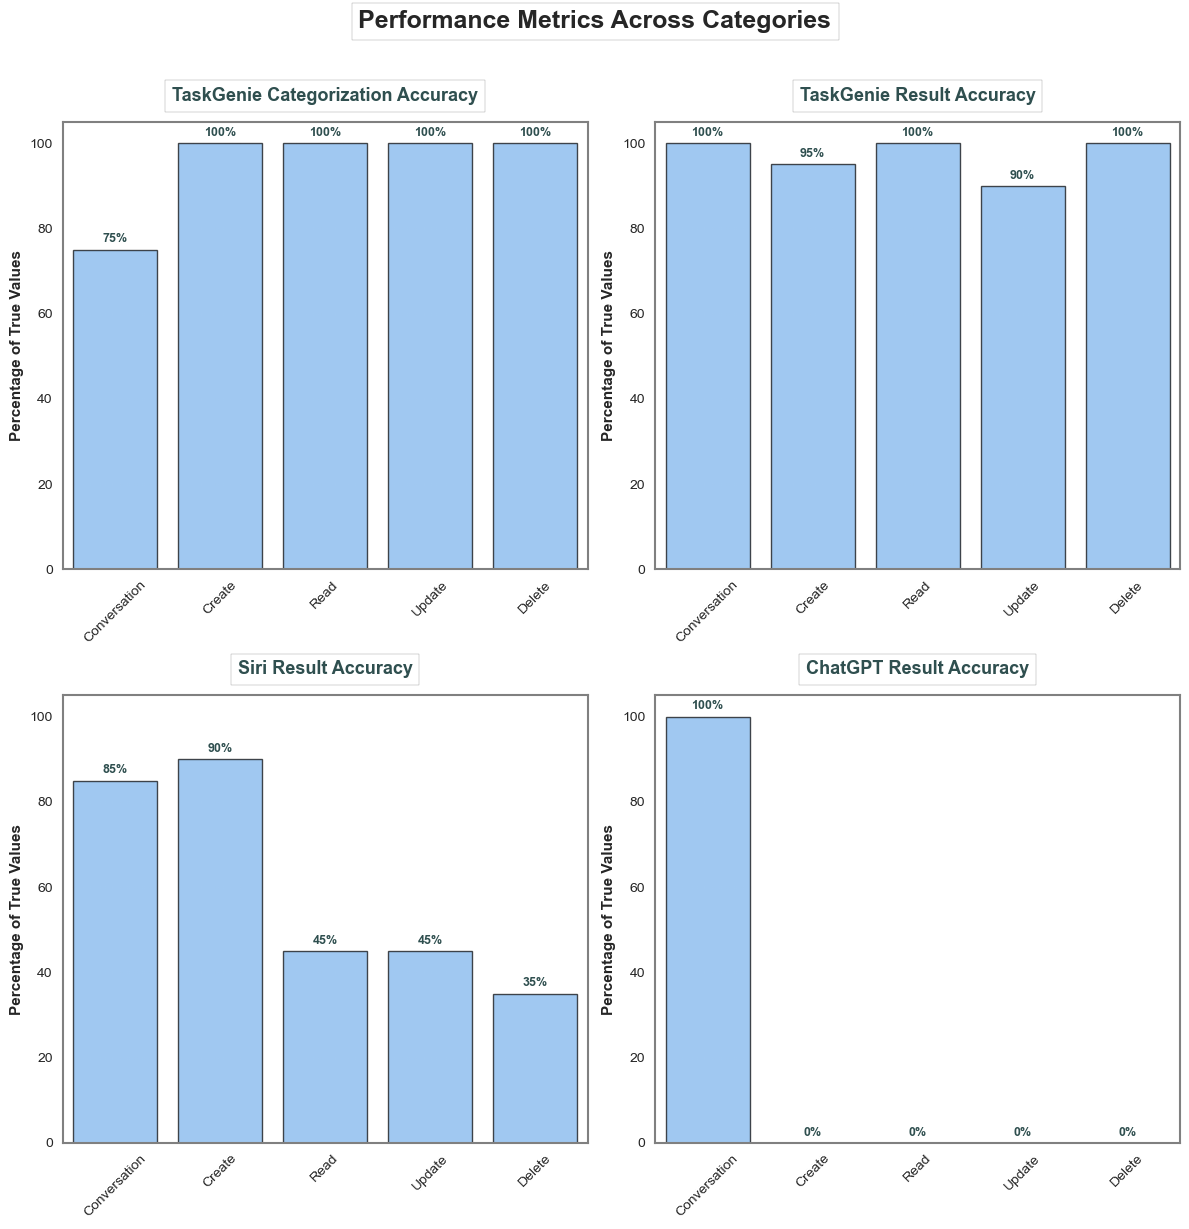

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-v0_8') 

# Recreate the data
df = proportions.reset_index()
df_melted = df.melt('Category', var_name='Metric', value_name='Proportion')
df_melted['Percentage'] = df_melted['Proportion'] * 100

# Define the custom order for categories
category_order = ['Conversation', 'Create', 'Read', 'Update', 'Delete']

# Create a figure with 2x2 subplots with transparent background
fig, axes = plt.subplots(2, 2, figsize=(12, 12), facecolor='none')
fig.patch.set_alpha(0.0)
metrics = ['Categorization Result Correct', 'TaskGenie Result Reasonable', 
           'Siri Result Reasonable', 'ChatGPT Result Reasonable']
titles = ['TaskGenie Categorization Accuracy', 'TaskGenie Result Accuracy', 
          'Siri Result Accuracy', 'ChatGPT Result Accuracy']

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, (ax, metric, title) in enumerate(zip(axes, metrics, titles)):
    # Filter data for current metric
    metric_data = df_melted[df_melted['Metric'] == metric]
    
    # Create bar plot with light blue color
    bars = sns.barplot(data=metric_data, x='Category', y='Percentage',
                      order=category_order, ax=ax, color='#66B2FF',
                      alpha=0.7)
    
    # Add edge color to bars
    for bar in bars.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    
    # Add percentage labels with enhanced styling
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', padding=3, fontsize=9,
                    fontweight='bold', color='darkslategray')
    
    # Customize each subplot
    ax.set_title(title, pad=15, size=13, fontweight='bold', 
                color='darkslategray', bbox=dict(facecolor='none', 
                edgecolor='gray', alpha=0.8, pad=5))
    ax.set_xlabel(None)
    ax.set_ylabel('Percentage of True Values', size=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 105)
    
    # Add grid with custom style
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set background color for subplot to transparent
    ax.set_facecolor('none')
    
    # Add box around subplot
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1.5)

# Add main title with styling
plt.suptitle('Performance Metrics Across Categories', 
             size=18, y=1.02, fontweight='bold', 
             bbox=dict(facecolor='none', edgecolor='gray', 
                      alpha=0.8, pad=5))

# Adjust layout
plt.tight_layout()

# Add a text watermark
# fig.text(0.99, 0.01, 'Created with Python', 
#          ha='right', va='bottom', alpha=0.5, 
#          fontsize=8, fontstyle='italic')

plt.show()

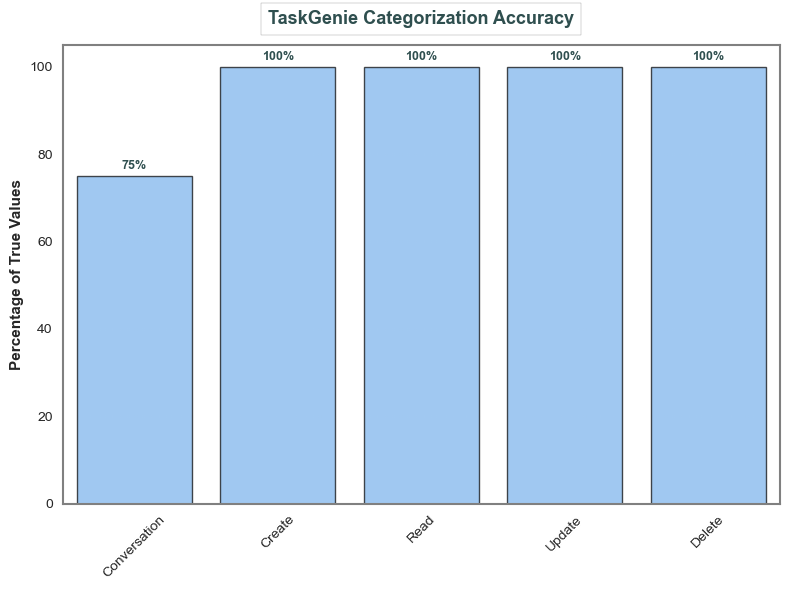

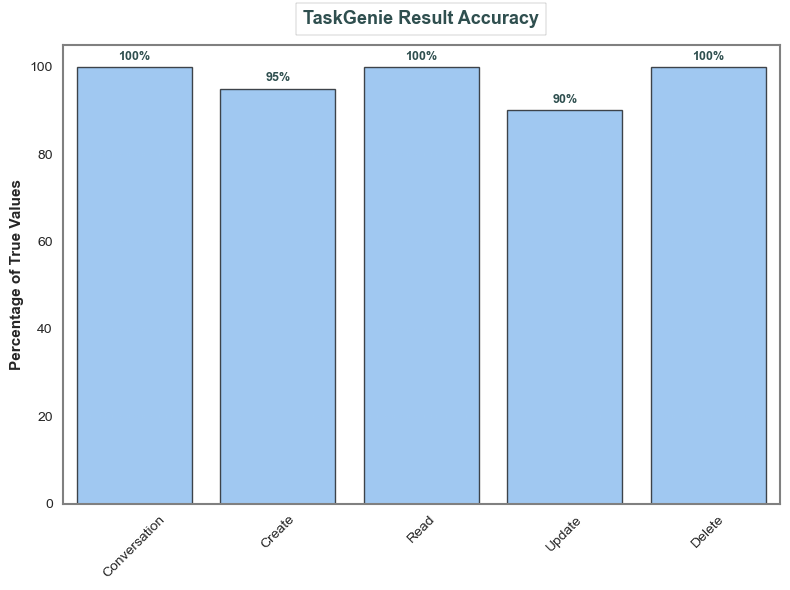

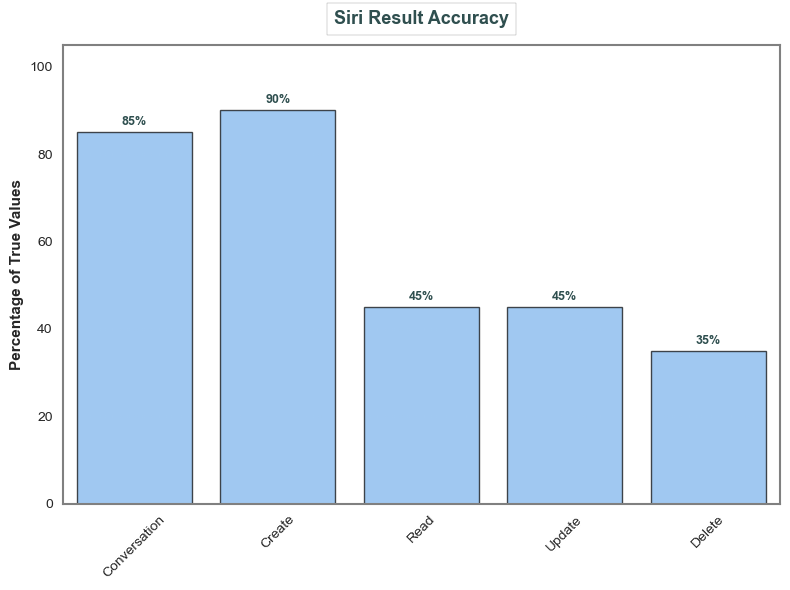

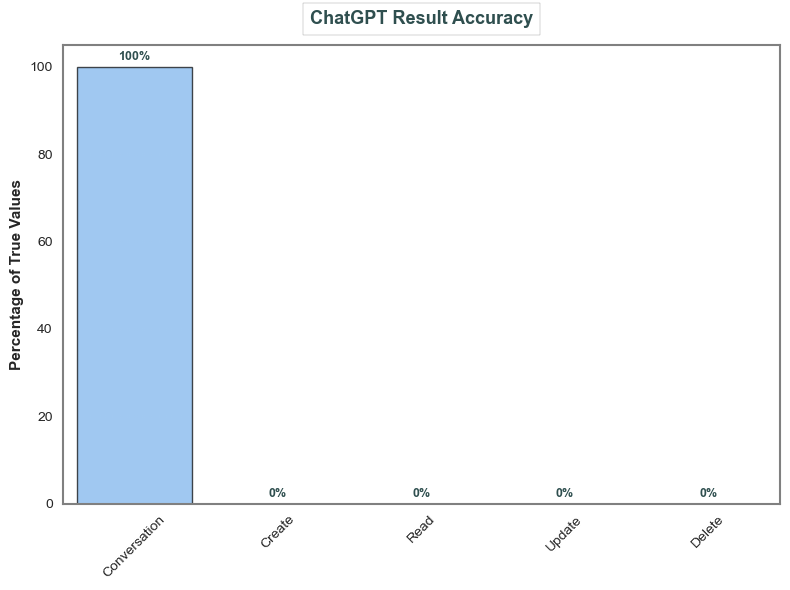

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
plt.style.use('seaborn-v0_8')

# Define the custom order for categories
category_order = ['Conversation', 'Create', 'Read', 'Update', 'Delete']

# Create separate figures for each metric
metrics = ['Categorization Result Correct', 'TaskGenie Result Reasonable', 
           'Siri Result Reasonable', 'ChatGPT Result Reasonable']
titles = ['TaskGenie Categorization Accuracy', 'TaskGenie Result Accuracy', 
          'Siri Result Accuracy', 'ChatGPT Result Accuracy']

# Function to create styled plot
def create_styled_plot(df_melted, metric, title):
    fig, ax = plt.subplots(figsize=(8, 6), facecolor='none')
    fig.patch.set_alpha(0.0)
    
    # Filter data for current metric
    metric_data = df_melted[df_melted['Metric'] == metric]
    
    # Create bar plot with light blue color
    bars = sns.barplot(data=metric_data, x='Category', y='Percentage',
                      order=category_order, ax=ax, color='#66B2FF',
                      alpha=0.7)
    
    # Add edge color to bars
    for bar in bars.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1)
    
    # Add percentage labels with enhanced styling
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', padding=3, fontsize=9,
                    fontweight='bold', color='darkslategray')
    
    # Customize plot
    ax.set_title(title, pad=15, size=13, fontweight='bold', 
                color='darkslategray', bbox=dict(facecolor='none', 
                edgecolor='gray', alpha=0.8, pad=5))
    ax.set_xlabel(None)
    ax.set_ylabel('Percentage of True Values', size=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_ylim(0, 105)
    
    # Add grid with custom style
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set background color to transparent
    ax.set_facecolor('none')
    
    # Add box around plot
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(1.5)
    
    # Add watermark
    # fig.text(0.99, 0.01, 'Created with Python', 
    #          ha='right', va='bottom', alpha=0.5, 
    #          fontsize=8, fontstyle='italic')
    
    plt.tight_layout()
    return fig

# Create and display separate plots
for metric, title in zip(metrics, titles):
    fig = create_styled_plot(df_melted, metric, title)
    plt.show()